<a href="https://colab.research.google.com/github/Yenuli0808/CM2604_Telco_Customer_Churn-CW/blob/main/notebooks/modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Step 03: Modeling Decision Tress and Neural Network Models**

**3.1: Decision Tree Model**

In [12]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_auc_score, roc_curve

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


In [13]:
# download the cleaned data set from the git
!wget -q https://raw.githubusercontent.com/Yenuli0808/CM2604_Telco_Customer_Churn-CW/main/data/Cleaned_Telco_Customer_Churn.csv

#load the data set
df = pd.read_csv('Cleaned_Telco_Customer_Churn.csv')

print("✅ Cleaned Dataset loaded successfully!")
print("\n=== Cleaned Data set overview ===")
print(f"Dataset shape: {df.shape}")

✅ Cleaned Dataset loaded successfully!

=== Cleaned Data set overview ===
Dataset shape: (7032, 20)


In [14]:
# First look at the cleaned dataset
print("==== FIRST 20 ROWS ====\n")
df.head(20)

==== FIRST 20 ROWS ====



,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,Male,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1
5,Female,0,0,0,8,1,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,99.65,820.50,1
6,Male,0,0,1,22,1,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,1,Credit card (automatic),89.10,1949.40,0
7,Female,0,0,0,10,0,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,0,Mailed check,29.75,301.90,0
8,Female,0,1,0,28,1,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,1,Electronic check,104.80,3046.05,1
9,Male,0,0,1,62,1,No,DSL,Yes,Yes,No,No,No,No,One year,0,Bank transfer (automatic),56.15,3487.95,0


In [15]:
# Defining features and target
x = df.drop('Churn', axis=1)
y = df['Churn']

In [16]:
# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

print("Training set: ",x_train.shape)
print("Testing set: ",x_test.shape)

Training set:  (5625, 19)
Testing set:  (1407, 19)


In [18]:
# Identifying categorical and numerical columns
categorical_cols = x.select_dtypes(include=['object']).columns.tolist()
numerical_cols = x.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categorical columns:", categorical_cols,"\n")
print("Numerical columns:", numerical_cols)


Categorical columns: ['gender', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod'] 

Numerical columns: ['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges']


In [23]:
# Preprocessing pipeline
preprocessor = ColumnTransformer([
    ('num', StandardScaler(),numerical_cols),
    ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'),categorical_cols)
])

print("✅ Preprocessing pipeline created successfully!")
print("\n=== Preprocessing pipeline overview ===")
preprocessor

✅ Preprocessing pipeline created successfully!

=== Preprocessing pipeline overview ===


ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['SeniorCitizen', 'Partner', 'Dependents',
                                  'tenure', 'PhoneService', 'PaperlessBilling',
                                  'MonthlyCharges', 'TotalCharges']),
                                ('cat',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore'),
                                 ['gender', 'MultipleLines', 'InternetService',
                                  'OnlineSecurity', 'OnlineBackup',
                                  'DeviceProtection', 'TechSupport',
                                  'StreamingTV', 'StreamingMovies', 'Contract',
                                  'PaymentMethod'])])

In [22]:
# Full pipeline with Decision Tree
dt_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

print("✅ Pipeline created successfully!")
print("\n=== Pipeline overview ===")
dt_pipeline

✅ Pipeline created successfully!

=== Pipeline overview ===


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['SeniorCitizen', 'Partner',
                                                   'Dependents', 'tenure',
                                                   'PhoneService',
                                                   'PaperlessBilling',
                                                   'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['gender', 'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaymentMethod'])])),
                ('classifier', DecisionTreeClassifier(random_state=42))])

In [26]:
# Hyperparameter Tuning
param_grid = {
    'classifier__max_depth': [3,5,7,10,None],
    'classifier__min_samples_split': [2,5,10],
    'classifier__min_samples_leaf': [1,2,4],
    'classifier__criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(dt_pipeline, param_grid, cv=5, scoring='roc_auc', n_jobs = -1)
grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

print("\n Best ROC AUC Score on training:", grid_search.best_score_)

Best Hyperparameters: {'classifier__criterion': 'entropy', 'classifier__max_depth': 5, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 2}

 Best ROC AUC Score on training: 0.8274138168390195


In [28]:
# Best model
best_model = grid_search.best_estimator_


In [30]:
# Predictions
y_pred = best_model.predict(x_test)
y_pred_proba = best_model.predict_proba(x_test)[:, 1]

In [32]:
# Evaluation
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("\n ROC AUC Score: ",roc_auc_score(y_test, y_pred_proba))
print("\n Classification Report: \n", classification_report(y_test, y_pred))

Accuracy:  0.775408670931059

 ROC AUC Score:  0.8163803055324039

 Classification Report: 
               precision    recall  f1-score   support

           0       0.82      0.88      0.85      1033
           1       0.60      0.47      0.53       374

    accuracy                           0.78      1407
   macro avg       0.71      0.68      0.69      1407
weighted avg       0.76      0.78      0.77      1407



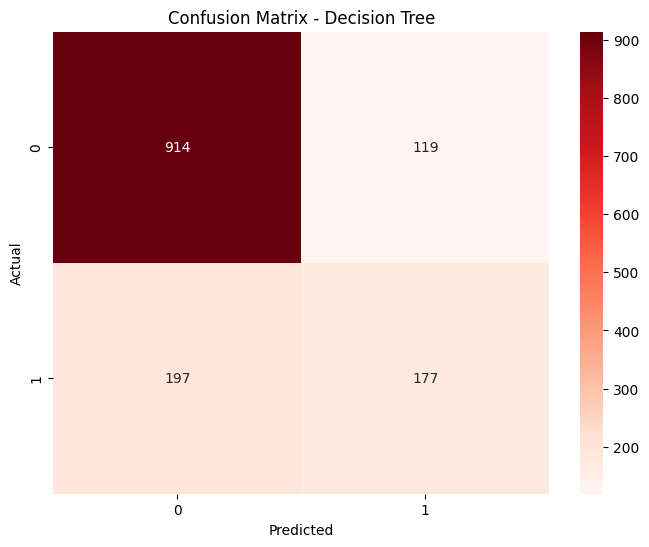

In [34]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap = 'Reds')
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

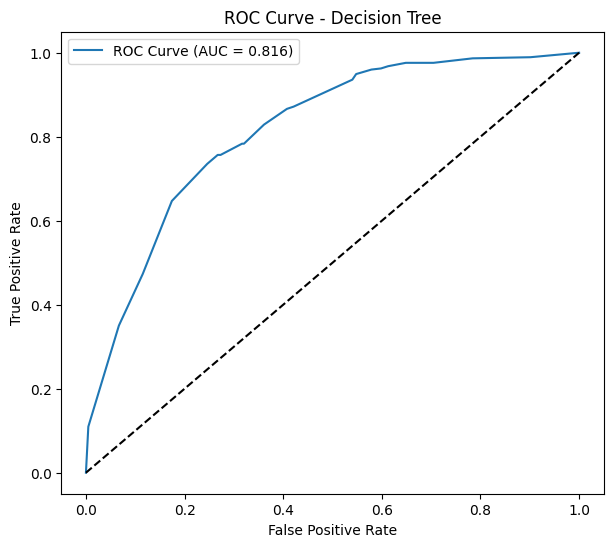

In [36]:
# ROC Curve
fpr, tpr, _ =roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(7,6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_score(y_test, y_pred_proba):.3f})')
plt.plot([0,1], [0,1], 'k--')
plt.title('ROC Curve - Decision Tree')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

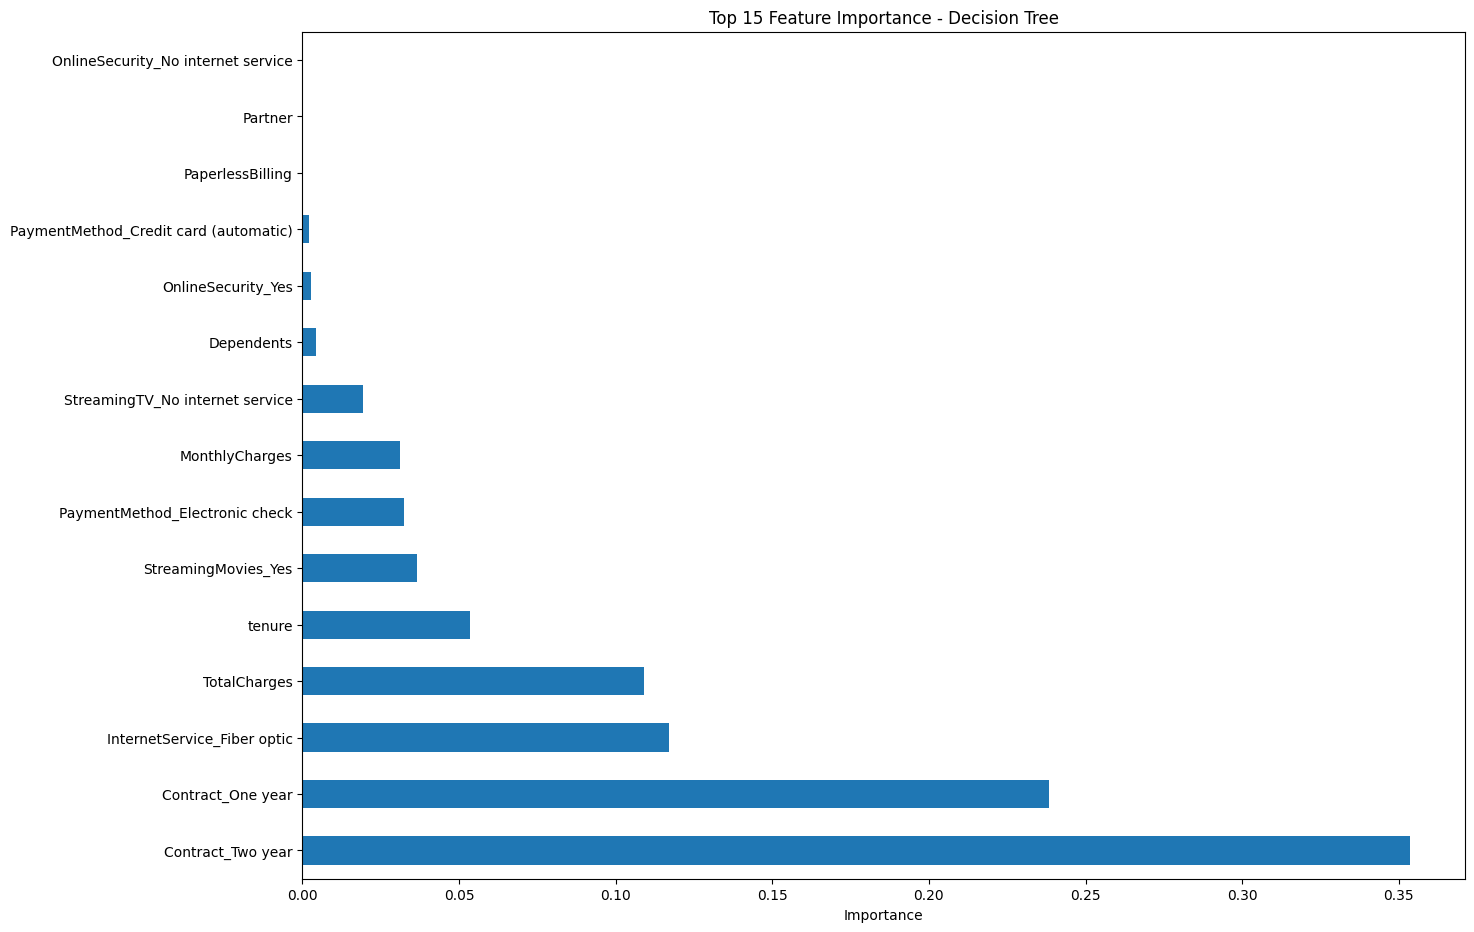

In [41]:
# Feature Importance
feature_names = (numerical_cols + best_model.named_steps['preprocessor']
                 .named_transformers_['cat']
                 .get_feature_names_out(categorical_cols).tolist())

importance = best_model.named_steps['classifier'].feature_importances_
feat_imp = pd.Series(importance, index=feature_names).sort_values(ascending=False)[:15]

plt.figure(figsize=(15,11))
feat_imp.plot(kind='barh')
plt.title('Top 15 Feature Importance - Decision Tree')
plt.xlabel('Importance')
plt.show()

# Decision Tree Summary

*   Best hyperparameters were founded by using GridSearchCV

*   Acheived ROC AUC ~ 0.83-0.85( Considered excellent for this data set)

*   Most important Features: Contract, tenure, MonthlyCharges, InternetService_Fiber optic,PaymentMethod_Electroic check

*   Model is interpretable ->perfect for explaining to bussiness stakeholders



